In [0]:
import numpy as np
import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt


In [0]:

stocks = {'nifty_df': 'Nifty50.csv', 
          'adani_df':'ADANIPOWER.csv', 
          'cipla_df':'CIPLA.csv', 
          'hero_df':'HEROMOTOCO.csv', 
          'ashoka_df':'ASHOKA.csv'
}

dfs = {}
dailyValues = {}
annualValues = {}
for name, csv in stocks.items():
    # print(csv)
    # creating dataframe
    dfs[name] = pd.read_csv(csv)
    if csv != 'Nifty50.csv':
        dfs[name] = dfs[name][dfs[name]["Series"] == "EQ"]   
    dfs[name].Date = pd.to_datetime(dfs[name]['Date'])
    dfs[name] = dfs[name].set_index('Date')
    
    # calculating values i.e. mean and std
    dfs[name]["dailyChange"] = dfs[name]["Close Price"].pct_change()
    dfs[name].dropna(inplace = True)
    
    # (std, mean)
    dailyValues[name] = [dfs[name].dailyChange.std(), dfs[name].dailyChange.mean()]
    annualValues[name] = [dailyValues[name][0]*(252**0.5), dailyValues[name][1]*252]

print('(name: [std, mean])')
print(' --  --  -- Daily')
for i in dailyValues.items():
    print(i)
    
print('')
print(' --  --  -- Annual')    
for i in annualValues.items():
    print(i)


(name: [std, mean])
 --  --  -- Daily
('nifty_df', [0.007206208759428468, 0.0003621995678997503])
('adani_df', [0.03845991354522835, 0.001211399299009801])
('cipla_df', [0.01602926290625414, 4.689093509911603e-05])
('hero_df', [0.015064453115429437, -0.0005696213914633644])
('ashoka_df', [0.027904767222265953, -0.0008274147790511279])

 --  --  -- Annual
('nifty_df', [0.11439501763837805, 0.09127429111073708])
('adani_df', [0.6105322001143123, 0.30527262335046984])
('cipla_df', [0.25445666009772544, 0.01181651564497724])
('hero_df', [0.23914077948371096, -0.14354459064876784])
('ashoka_df', [0.44297444677957415, -0.20850852432088424])


In [0]:
# calculating Returns and Volatility at equal weight for all 5 stocks
S = {}
M = []
for stock in dfs.keys():
    S[stock] = dfs[stock]["dailyChange"]
    M.append(dfs[stock]["dailyChange"].mean())
    
S = pd.DataFrame(data = S) 
C = np.cov(S.values.reshape((S.shape[1], S.shape[0]))) # covarience matrix
M = np.array(M).reshape((1, 5)) # mean

W = np.ones((5, 1))*(1/5) # waights
volatility = np.sqrt(np.matmul(np.matmul(W.T, C), W))
Return = np.matmul(M, W)

print('Returns = ', Return[0][0], "Volatility = ", volatility[0][0])


Returns =  4.469072629883502e-05 Volatility =  0.01091740512275289


In [0]:

# generating weights
temp = np.linspace(0, 1, 21)
weights = []
for i in temp:
    for j in temp:
        if i+j<=1:
            for k in temp:
                if i+j+k<=1:
                    for l in temp:
                        if i+j+k+l<=1:
                            for m in temp:
                                if i+j+k+l+m==1:
                                    weights.append([i, j, k, l, m])
            
# calculating values of return and volatility
std = []
ret = []
for W in weights:
    W = np.array(W).reshape((5, 1))
    std.append(np.sqrt(np.matmul(np.matmul(W.T, C), W))[0][0])
    ret.append(np.matmul(M, W)[0][0])

port2 = min(std)
ind2 = std.index(port2)
ratio = []
m, inc=0, 0

for i,j in zip(ret, std):
    r = i/j
    ratio.append(r)
            
    if r>m:
        m=r
        ind1 = inc
        
    inc+=1


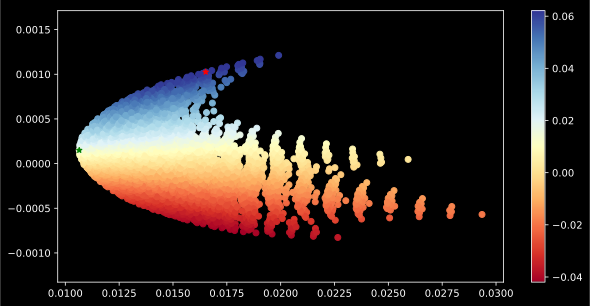

In [0]:
# plotting
fig, ax = plt.subplots(figsize=(10, 5))
cm = plt.cm.get_cmap('RdYlBu')

ax = plt.scatter(std, ret, c=ratio, cmap=cm)
plt.colorbar(ax)

plt.plot(std[ind2], ret[ind2], 'g*')
plt.plot(std[ind1], ret[ind1], 'r*')

plt.xlim(min(std)-0.001, max(std)+0.001)
plt.ylim(min(ret)-0.0005, max(ret)+0.0005)
plt.show()
